<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src='https://i.postimg.cc/nLrB2Szm/BANNER-IMAGE-1-1520-X560.jpg'>

<div style="border-radius:10px; padding: 15px; background-color: #e3e6fa; text-align:left; font-size:120%; background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">

<h4 align="left"><span style="font-weight:700; font-size:160%"><font color=#005f26>Description:</font></span></h4>

<span style="font-weight:100; color:navy; font-weight:500">According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient</apan>.


<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Table Of Content</p></b></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
    -  [2.3 | Attribute Information](#columns)
 *  **[Step 3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Missing Values Handling](#missing)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.3 | Plots Analysis](#plot_analysis)
    -  [3.4 | Unique Values](#unique)
    -  [3.5 | Normalization](#norm)
 *  **[Step 4 | Modeling](#ml)**
    -  [4.1 | Initialization](#init)
    -  [4.2 | RandomForestClassifier](#rf)
    -  [4.3 | LogisticRegression](#lr)
    -  [4.4 | SVC](#svc)
    -  [4.5 | DecisionTreeClassifier](#tree)
    -  [4.6 | KNeighborsClassifier](#knn)
    -  [4.7 | result](#result)
    -  [4.8 | Final Modeling](#final_ml)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="import"></a>
<h2><b><span style="color:#005f26">🔶 Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b></h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

<a id="config"></a>
<h2><b><span style="color:#005f26">🔶 Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b></h2>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2 | Data</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="load_data"></a>
<h2><b><span style="color:#005f26">🔶 Step 2.1 | </span><span style="color:#ff6200">Collecting Data</span></b></h2>

<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ At first, import dataset in csv format by <code>pandas</code> library and read_csv method.
    </p>
</div>

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<a id="info"></a>
<h2><b><span style="color:#005f26">🔶 Step 2.2 | </span><span style="color:#ff6200">Data Informations</span></b></h2>

<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ We drop id columns, because its a unique identifier number.
    </p>
</div>

In [4]:
# Drop column = 'id'
data.drop(columns='id', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
round(data.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ We have 5110 samples , with no null values
    </p>
</div>

<a id="columns"></a>
<h2><b><span style="color:#005f26">🔶 Step 2.3 | </span><span style="color:#ff6200">Attribute Information</span></b></h2>

<div style="background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">
    <h3 style="font-size:200%; color:#005f26"><b>Attribute Information</b></h3>
<center>

|Feature|Describtion|
|:-----:|:---------:|
|id| unique identifier|
|gender| "Male", "Female" or "Other"|
|age| age of the patient|
|hypertension| 0 if the patient doesn't have hypertension, 1 if the patient has hypertension|
|heart_disease| 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart diseas|
|ever_married| "No" or "Yes"|
|work_type| "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"|
|Residence_type| "Rural" or "Urban"|
|avg_glucose_level| average glucose level in blood|
|bmi| body mass index|
|smoking_status| "formerly smoked", "never smoked", "smokes" or "Unknown"*|
|stroke| 1 if the patient had a stroke or 0 if not|

</center>
</br>
<span style="font-size:175%; font-weight:bolder; color:#005f26">Note : </span> <span style="font-size:130%; font-weight:bold; color:#005f26">"Unknown" in smoking_status means that the information is unavailable for this patient.</span>
</br>
</div>

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Preprocessning</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 3.1 | </span><span style="color:#ff6200">Missing Values Handling</span></b></h2>

In [7]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
print((data.isna().sum()/len(data))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ There is 201 samples with no values in <code>bmi</code> column , its about 4% of data. For better result we drop them.
    </p>
</div>

In [9]:
### Missing values in BMI columns is about 4% , we drop them.
data.dropna(how='any', inplace=True)

<a id="plot"></a>
<h2><b><span style="color:#005f26">🔶 Step 3.2 | </span><span style="color:#ff6200">Visualization and Plots</span></b></h2>

In [10]:
cols = data.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

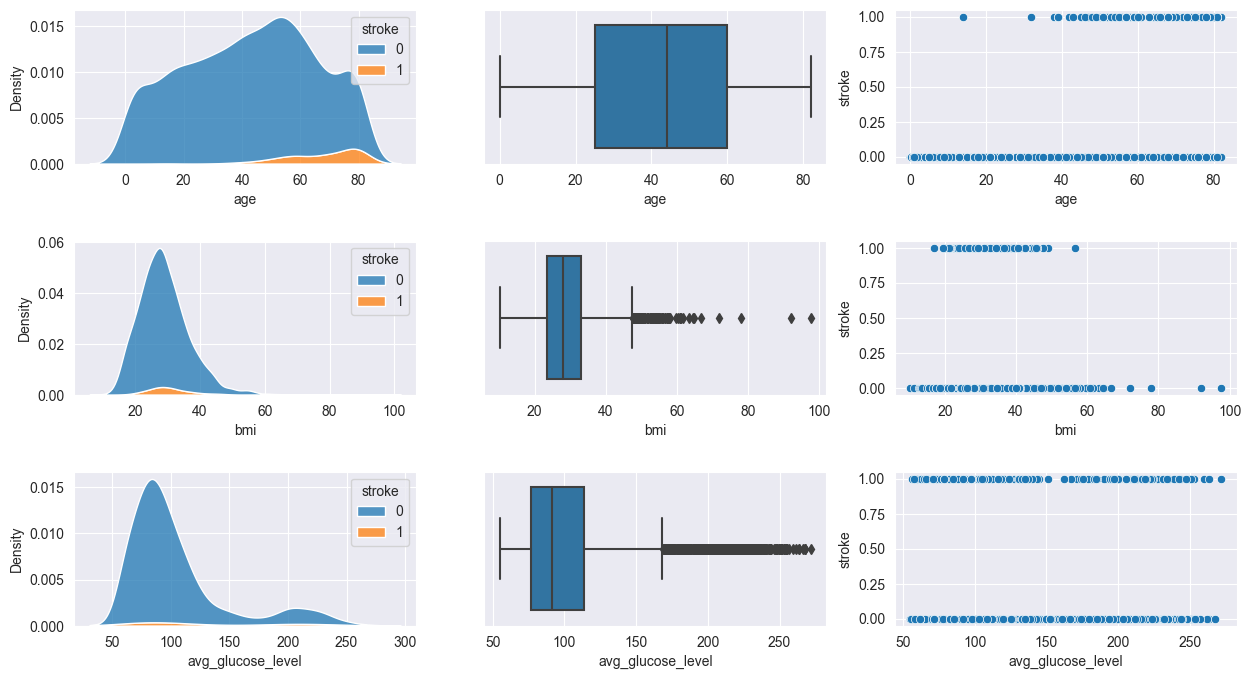

In [13]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])
    i+=1
plt.show()

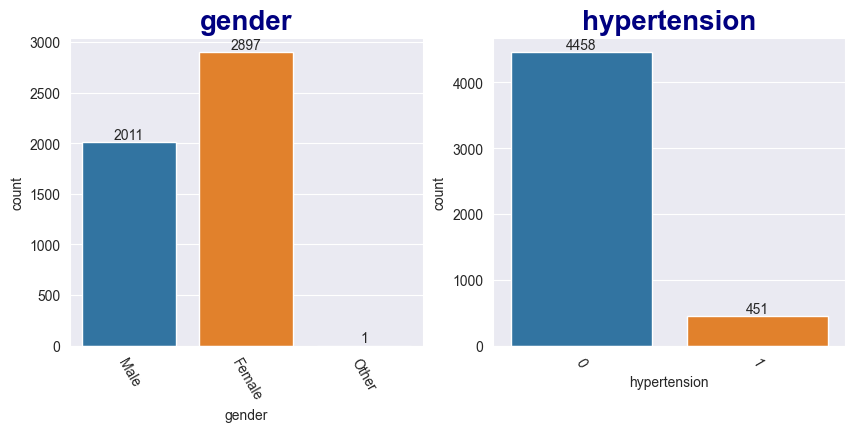

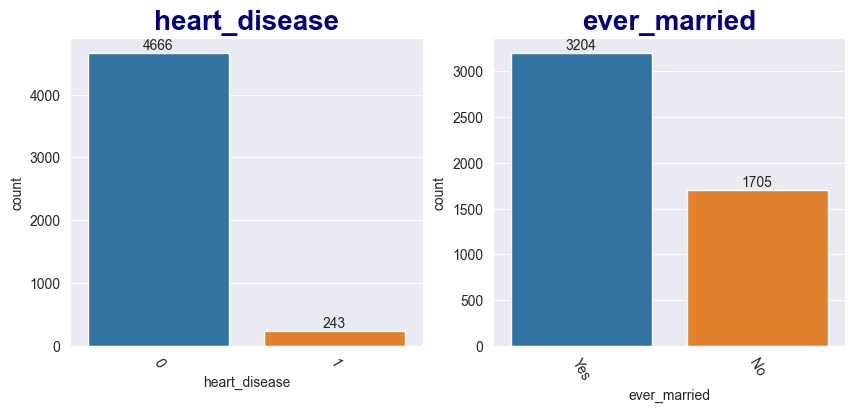

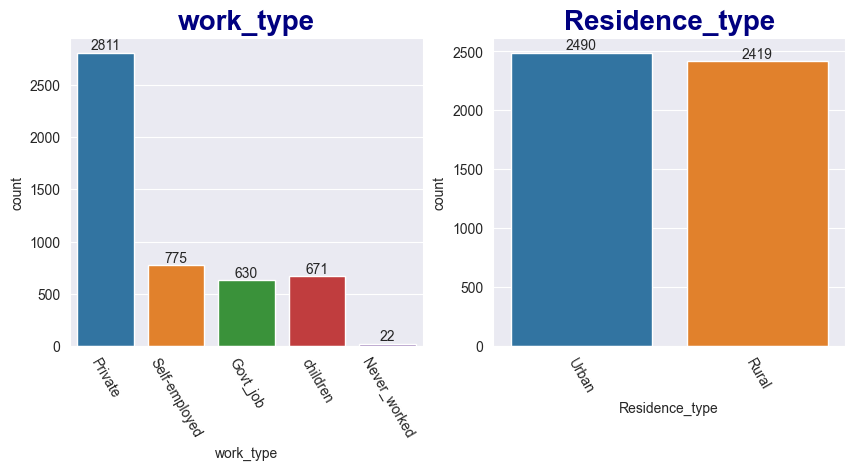

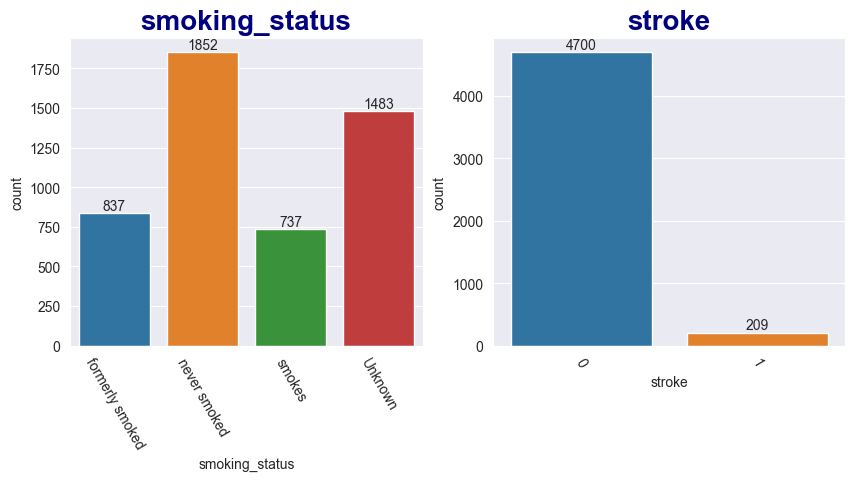

In [14]:
i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

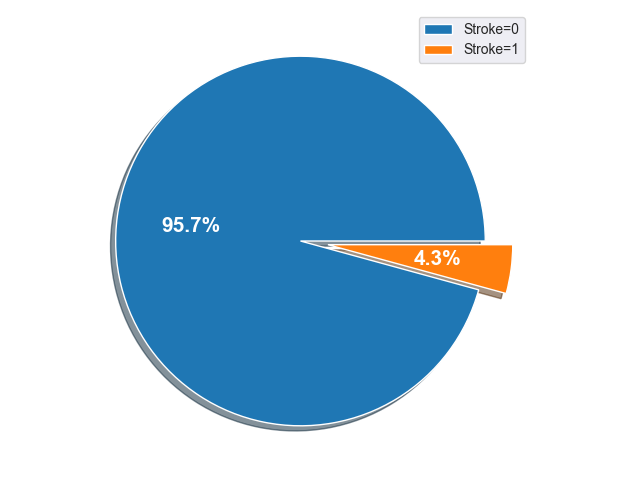

In [15]:
x = data['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

<a id="plot_analysis"></a>
<h2><b><span style="color:#005f26">🔶 Step 3.3 | </span><span style="color:#ff6200">Plots Analysis</span></b></h2>

<div style="background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">
<h3 style="font-size:175%; font-weight:bolder; color:#005f26">Results : </h3>
    
<span style="font-size:110%; font-weight:700; color:#005f26">
<ol>1) About 96% of samples have not Stroke and 4% have stroke.</ol>
<ol>2) Distribution of samples is a Normal distribution.</ol>
<ol>3) Those who have had a stroke are in:
    <ul>age in range 40 to 85</ul>
    <ul>bmi in range 20 to 40</ul>
    <ul>glocuse level in range 50 to 130</ul></ol>
<ol>4) About 60% of samples are female.</ol>
<ol>5) About 91% of samples dont have any hypertension.</ol>
<ol>6) About 95% of samples dont have any heart disease.</ol>
<ol>7) About 34% of samples never get married.</ol>
<ol>8) Most of samples worked in private.</ol>
<ol>9) We dont have any information in smoking field for 1483 of sapmples.</ol>
</br>
</span>
</div>

<a id="unique"></a>
<h2><b><span style="color:#005f26">🔶 Step 3.4 | </span><span style="color:#ff6200">Unique Values</span></b></h2>

<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ We count number of unique values in each categorical column, to change them with integer values. Here we use <code>.unique()</code> command.
    </p>
</div>

In [16]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [17]:
# gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [18]:
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


<a id="norm"></a>
<h2><b><span style="color:#005f26">🔶 Step 3.5 | </span><span style="color:#ff6200">Normalization</span></b></h2>

<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ Define X & y 
    </p>
</div>

In [19]:
X_temp = data_2.drop(columns='stroke')
y = data_2.stroke

<div style="background-color: #f2faf5">
    <p style="color:navy; font-size:120%">
       ➡️ To decrease effect of larg values, we use <code>MinMaxScaler</code> to normalize X.
    </p>
</div>

In [20]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.295274,0.522282,0.091872,0.049501,0.347321,0.210634,0.492768,0.231674,0.212981,0.527942
std,0.246098,0.275331,0.288875,0.216934,0.476167,0.281014,0.499999,0.205080,0.089966,0.363382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.101330,0.151203,0.333333
50%,0.500000,0.536133,0.000000,0.000000,0.000000,0.000000,0.000000,0.168775,0.203895,0.333333
75%,0.500000,0.731445,0.000000,0.000000,1.000000,0.500000,1.000000,0.269827,0.261168,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="ml"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling </p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="init"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.1 | </span><span style="color:#ff6200">Initialization</span></b></h2>

In [21]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [22]:
# Splite X, y to train & test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

<a id="rf"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.2 | </span><span style="color:#ff6200">RandomForestClassifier</span></b></h2>

In [23]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
accuracy :  0.9557197773064688


In [24]:
# calculate time befor run algorithm
t1 = datetime.now()
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
# calculate time after run algorithm
t2 = datetime.now()

In [25]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.959


In [26]:
delta = t2-t1
delta_rf = round(delta.total_seconds(), 3)
print('RandomForestClassifier takes : ', delta_rf, 'Seconds')

RandomForestClassifier takes :  0.238 Seconds


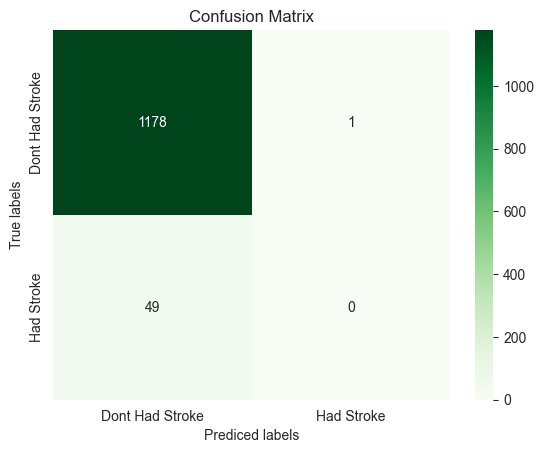

In [27]:
plot_confusion_matrix(y_test, y_pred_rf)

In [28]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



<a id="lr"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.3 | </span><span style="color:#ff6200"> LogisticRegression</span></b></h2>

In [29]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.7413846176505243


In [30]:
# Calculate time befor run algorithm
t1 = datetime.now()
# Model
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm
t2 = datetime.now()

In [31]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.739


In [32]:
delta = t2-t1
delta_lr = round(delta.total_seconds(), 3)
print('LogisticRegression takes : ', delta_lr, 'Seconds')

LogisticRegression takes :  0.008 Seconds


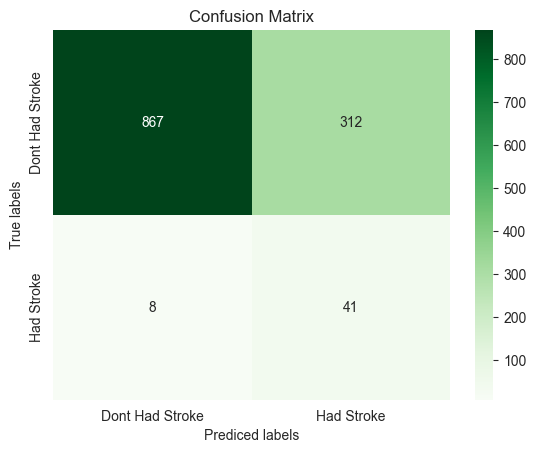

In [33]:
plot_confusion_matrix(y_test, y_pred_lr)

In [34]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1179
           1       0.12      0.84      0.20        49

    accuracy                           0.74      1228
   macro avg       0.55      0.79      0.52      1228
weighted avg       0.96      0.74      0.82      1228



<a id="svc"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.4 | </span><span style="color:#ff6200"> SVC</span></b></h2>

In [35]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'gamma': 0.001}
accuracy :  0.9565335218569577


In [36]:
# Calculate time befor run algorithm
t1 = datetime.now()
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm
t2 = datetime.now()

In [37]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.96


In [38]:
delta = t2-t1
delta_svc = round(delta.total_seconds(), 3)
print('SVC : ', delta_svc, 'Seconds')

SVC :  0.036 Seconds


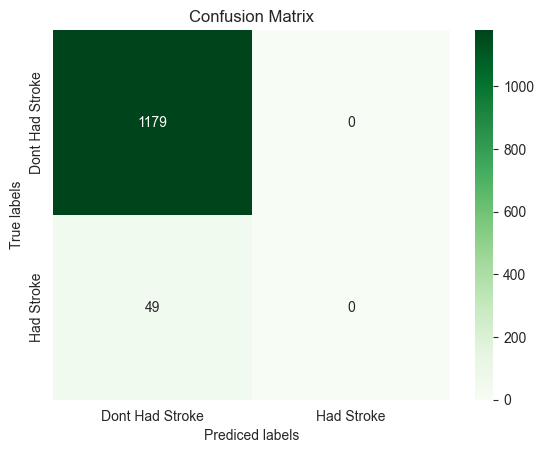

In [39]:
plot_confusion_matrix(y_test, y_pred_svc)

In [40]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



<a id="tree"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.5 | </span><span style="color:#ff6200"> DecisionTreeClassifier</span></b></h2>

In [41]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
accuracy :  0.9565335218569577


In [42]:
# Calculate time befor run algorithm :
t1 = datetime.now()
# Model :
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [43]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.959


In [44]:
delta = t2-t1
delta_tree = round(delta.total_seconds(), 3)
print('DecisionTreeClassifier takes : ', delta_tree, 'Seconds')

DecisionTreeClassifier takes :  0.003 Seconds


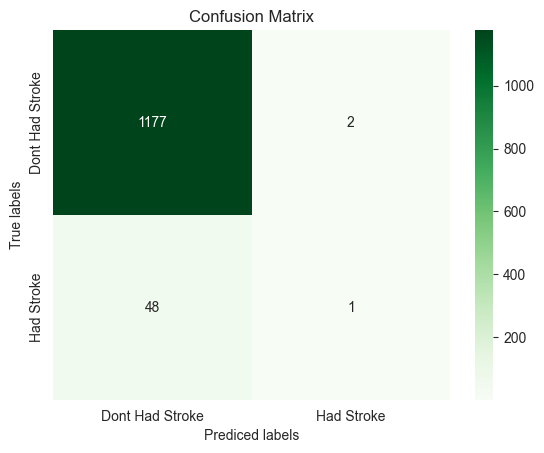

In [45]:
plot_confusion_matrix(y_test, y_pred_tree)

In [46]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.33      0.02      0.04        49

    accuracy                           0.96      1228
   macro avg       0.65      0.51      0.51      1228
weighted avg       0.94      0.96      0.94      1228



<a id="knn"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.6 | </span><span style="color:#ff6200"> KNeighborsClassifier</span></b></h2>

In [47]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

# calculate time to run in second
t1 = datetime.now()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

t2 = datetime.now()

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 11, 'p': 1}
accuracy :  0.9565335218569577


In [48]:
# Calculate time befor run algorithm :
t1 = datetime.now()
# Model :
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [49]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.959


In [50]:
delta = t2-t1
delta_knn = round(delta.total_seconds(), 3)
print('KNeighborsClassifier takes : ', delta_knn, 'Seconds')

KNeighborsClassifier takes :  0.007 Seconds


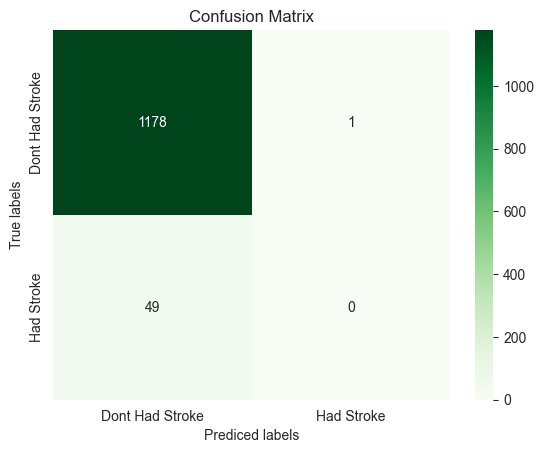

In [51]:
plot_confusion_matrix(y_test, y_pred_knn)

In [52]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



<a id="result"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.7 | </span><span style="color:#ff6200"> Result</span></b></h2>

In [53]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score],
    'Delta_t' : [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn]
})

result

,Algorithm,Score,Delta_t
0,RandomForestClassifier,0.959,0.238
1,LogisticRegression,0.739,0.008
2,SVC,0.960,0.036
3,DecisionTreeClassifier,0.959,0.003
4,KNeighborsClassifier,0.959,0.007


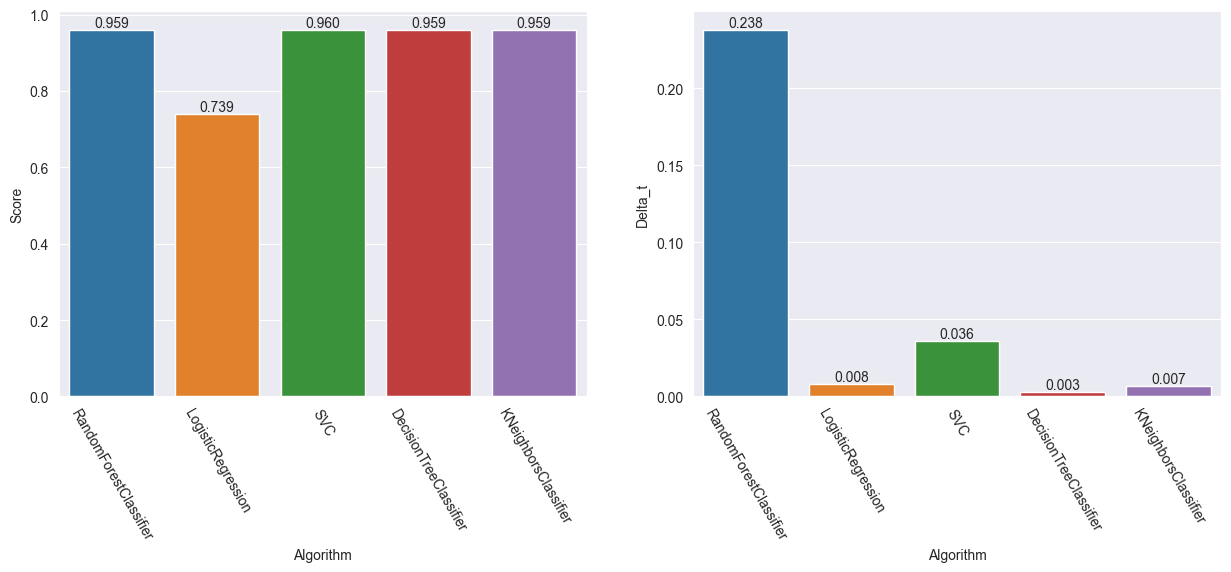

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_xticklabels(labels=result.Algorithm, rotation=300)

sns.barplot(x='Algorithm', y='Delta_t', data=result, ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt='%.3f')
ax[1].set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

<div style="background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">
<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best algorithms base on Score are :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul>RandomForestClassifier</ul>
<ul>SVC</ul>
<ul>DecisionTreeClassifier</ul>
<ul>KNeighborsClassifier</ul>
</br>
</span>

<span style="font-size:120%; font-weight:700; color:#005f26"> And best Algorithm base on runtime, are :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul>DecisionTreeClassifie</ul>
<ul>KNeighborsClassifier</ul>

</br>
</span>
</br>

<span style="font-size:150%; font-weight:bolder; color:navy">We choose <code> KNeighborsClassifier </code></span>
</div>

<a id="final_ml"></a>
<h2><b><span style="color:#005f26">🔶 Step 4.8 | </span><span style="color:#ff6200"> Final Modeling</span></b></h2>

In [55]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X, y)
knn

KNeighborsClassifier(n_neighbors=11, p=1)

In [56]:
knn.score(X, y)

0.9576288449786107

<img src="https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg">

<a id="author"></a>    
<div style="border-radius:10px; padding: 15px; font-size:130%; text-align:left; background-image: url(https://i.postimg.cc/T1gYxL48/v870-tang-35.jpg)">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>